In [26]:
import torch
import torchvision
import lab
from matplotlib import pyplot as plt 

alexnet = torchvision.models.alexnet(weights=None)
alexnet.load_state_dict(torch.load('data/alexnet.pth'))

<All keys matched successfully>

In [27]:
from PIL import Image

# Obtain and preprocess an image
im = Image.open('archive/Cars Detection/train/images/00aaf0a0a9ee7e71_jpg.rf.808b1e59067887493dffad63561c2a9d.jpg')

preprocess = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224),),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

im_normalized = preprocess(im)[None,:]
print(f"The shape of AlexNet input is {list(im_normalized.shape)}")

The shape of AlexNet input is [1, 3, 224, 224]


In [28]:
# Put the model in evaluation mode
alexnet.eval()

# Run the CNN
y = alexnet(im_normalized)

print(f"The shape of AlexNet output is {list(y.shape)}")

The shape of AlexNet output is [1, 1000]


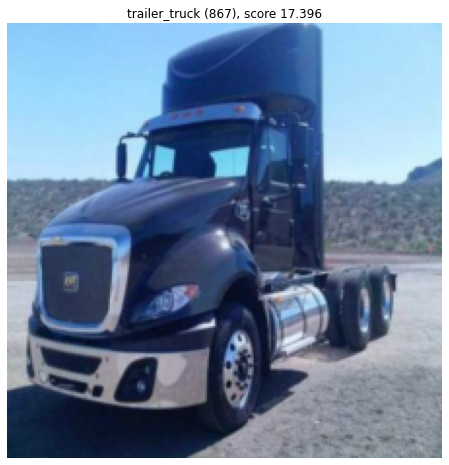

In [29]:
import json

# Get the best class index and score
best, bestk = y.max(dim=1)

# Get the corresponding class name
with open('data/imnet_classes.json') as f:
    classes = json.load(f)
name = classes[str(bestk.item())][1]

# Plot the results
plt.figure(1, figsize=(8,8))
lab.imsc(im_normalized[0])
plt.title(f"{name} ({bestk.item()}), score {best.item():.3f}") ;